#import


In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import os

#Model

In [2]:
class Net(nn.Module): #4개의 층 구성 input : 1, hidden : 2, output : 1
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,10)

    def forward(self, x):
        x1 = self.fc1(x)
        x2 = self.relu(x1)
        x3 = self.fc2(x2)
        x4 = self.relu(x3)
        x5 = self.fc3(x4)

        return x5

# MNIST data set

In [7]:
download_root = './MNIST_data'

dataset1 = datasets.MNIST(root = download_root,
                         train=True,
                         transform = transforms.ToTensor(),
                         download=True)

dataset2 = datasets.MNIST(root=download_root,
                         train=False,
                         transform = transforms.ToTensor(),
                         download=True)

#Batch SIZE

In [8]:
batch = 100
set1_loader = DataLoader(dataset1, batch_size = batch) #len 600
set2_loader = DataLoader(dataset2, batch_size = batch) #len 100

#optimizer

In [17]:
model = {}
loss_dict = {}
accuracy_dict = {}
# 4가지 테스트 케이스
optimizer_case = ['SGD','MMT','AdaGrad','RMSprop','Adam']
for key in optimizer_case:
    model[key] = Net()
    loss_dict[key] = []
    accuracy_dict[key] = []

optimizer_dict = {}
optimizer_dict['SGD'] = optim.SGD(model['SGD'].parameters(),lr = 0.01)
optimizer_dict['MMT'] = optim.SGD(model['MMT'].parameters(), lr=0.01, momentum = 0.9)
optimizer_dict['AdaGrad'] = optim.Adagrad(model['AdaGrad'].parameters(), lr=0.01)
optimizer_dict['RMSprop'] = optim.RMSprop(model['RMSprop'].parameters(),lr=0.01)
optimizer_dict['Adam'] = optim.Adam(model['Adam'].parameters(),lr= 0.01)

# loss function & epoch

In [18]:
loss_function = nn.CrossEntropyLoss()
total_batch = len(set1_loader) # 600
epochs = np.arange(1,16)

#train

In [19]:
for optimizer_name, optimizer in optimizer_dict.items():
    print(optimizer_name)
    for epoch in epochs:
        cost=0
        for images, labels in set1_loader:
            # 한 Tensor에 데이터 784(28x28)개가 담긴 리스트 100개
            # 총 set1_loader의 len인 600
            images = images.reshape(100,784)

            model[optimizer_name].zero_grad()

            # feedforward
            predict = model[optimizer_name].forward(images)

            # loss
            loss = loss_function(predict,labels)

            # backpropagation
            loss.backward()

            # update
            optimizer.step()

            cost += loss # 총 600번의 loss 더함

        with torch.no_grad(): # 미분X
            total = 0
            correct = 0
            for images, labels in set2_loader:
                images = images.reshape(100,784)

                outputs = model[optimizer_name].forward(images)

                # 1 지정 -> 하나의 행에서 가장 큰 값을 find
                # dim을 지정하면 값과 인덱스를 return
                _,predict = torch.max(outputs, 1)

                total += labels.size(0)
                correct += (predict == labels).sum()

            avg_cost = cost / total_batch # loss 값 600개의 평균
            accuracy = 100 * (correct/total)

            loss_dict[optimizer_name].append(avg_cost)
            accuracy_dict[optimizer_name].append(accuracy)

            print("epoch : {} | loss : {:.6f}" .format(epoch, avg_cost.item()))
            print("Accuracy : {:.2f}".format((100*correct/total).item()))

SGD
epoch : 1 | loss : 1.999564
Accuracy : 68.37
epoch : 2 | loss : 0.869658
Accuracy : 84.70
epoch : 3 | loss : 0.505743
Accuracy : 88.46
epoch : 4 | loss : 0.406862
Accuracy : 89.78
epoch : 5 | loss : 0.363173
Accuracy : 90.54
epoch : 6 | loss : 0.336882
Accuracy : 90.88
epoch : 7 | loss : 0.317880
Accuracy : 91.33
epoch : 8 | loss : 0.302566
Accuracy : 91.77
epoch : 9 | loss : 0.289405
Accuracy : 92.07
epoch : 10 | loss : 0.277746
Accuracy : 92.36
epoch : 11 | loss : 0.267149
Accuracy : 92.64
epoch : 12 | loss : 0.257296
Accuracy : 92.93
epoch : 13 | loss : 0.248030
Accuracy : 93.20
epoch : 14 | loss : 0.239216
Accuracy : 93.43
epoch : 15 | loss : 0.230799
Accuracy : 93.57
MMT
epoch : 1 | loss : 0.679971
Accuracy : 91.28
epoch : 2 | loss : 0.261918
Accuracy : 93.54
epoch : 3 | loss : 0.189792
Accuracy : 94.84
epoch : 4 | loss : 0.148493
Accuracy : 95.52
epoch : 5 | loss : 0.121345
Accuracy : 95.83
epoch : 6 | loss : 0.101813
Accuracy : 96.02
epoch : 7 | loss : 0.087381
Accuracy : 96

#Graph test

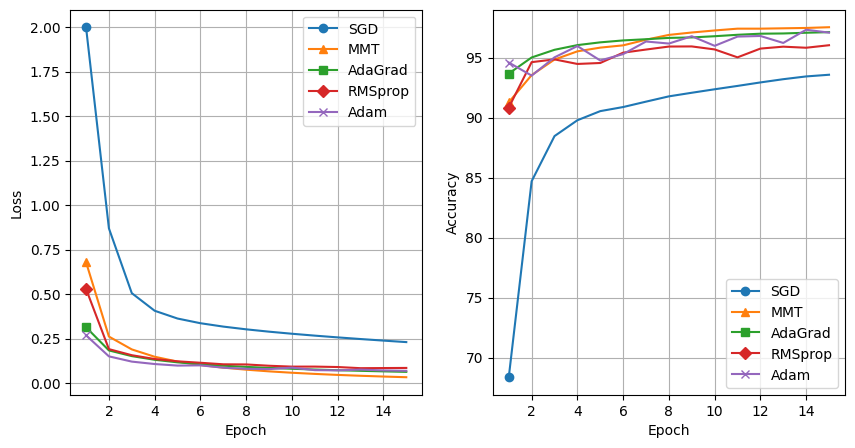

In [23]:
markers = {'SGD' : 'o', 'MMT' : '^', 'AdaGrad' : 's', 'RMSprop' : 'D', 'Adam' : 'x'}
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

for key in optimizer_case:
    plt.plot(epochs,loss_dict[key], marker = markers[key], markevery=100, label = key)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
for key in optimizer_case:
    plt.plot(epochs, accuracy_dict[key],marker = markers[key], markevery=100, label=key)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.grid(True)
plt.show()

In [26]:
for epoch, acc in enumerate(accuracy_dict['SGD']):
    print(f"Epoch {epoch}: Accuracy = {acc:.2f}%")

avg_accuracy = sum(accuracy_dict['SGD']) / len(accuracy_dict['SGD'])
print(f"Average Accuracy (SGD): {avg_accuracy:.2f}%")

Epoch 0: Accuracy = 68.37%
Epoch 1: Accuracy = 84.70%
Epoch 2: Accuracy = 88.46%
Epoch 3: Accuracy = 89.78%
Epoch 4: Accuracy = 90.54%
Epoch 5: Accuracy = 90.88%
Epoch 6: Accuracy = 91.33%
Epoch 7: Accuracy = 91.77%
Epoch 8: Accuracy = 92.07%
Epoch 9: Accuracy = 92.36%
Epoch 10: Accuracy = 92.64%
Epoch 11: Accuracy = 92.93%
Epoch 12: Accuracy = 93.20%
Epoch 13: Accuracy = 93.43%
Epoch 14: Accuracy = 93.57%
Average Accuracy (SGD): 89.74%
